In [269]:
%reset -f
# Number 1: Import anything you need for the lower cells, and set any defaults (I’ll run once)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style="whitegrid")
df = sns.load_dataset('titanic') 
df.info()

sns.set_color_codes("dark") # Setting the color for graph
sns.set_context("poster")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


Text(0.5, 0, 'Frequency of Missing Data')

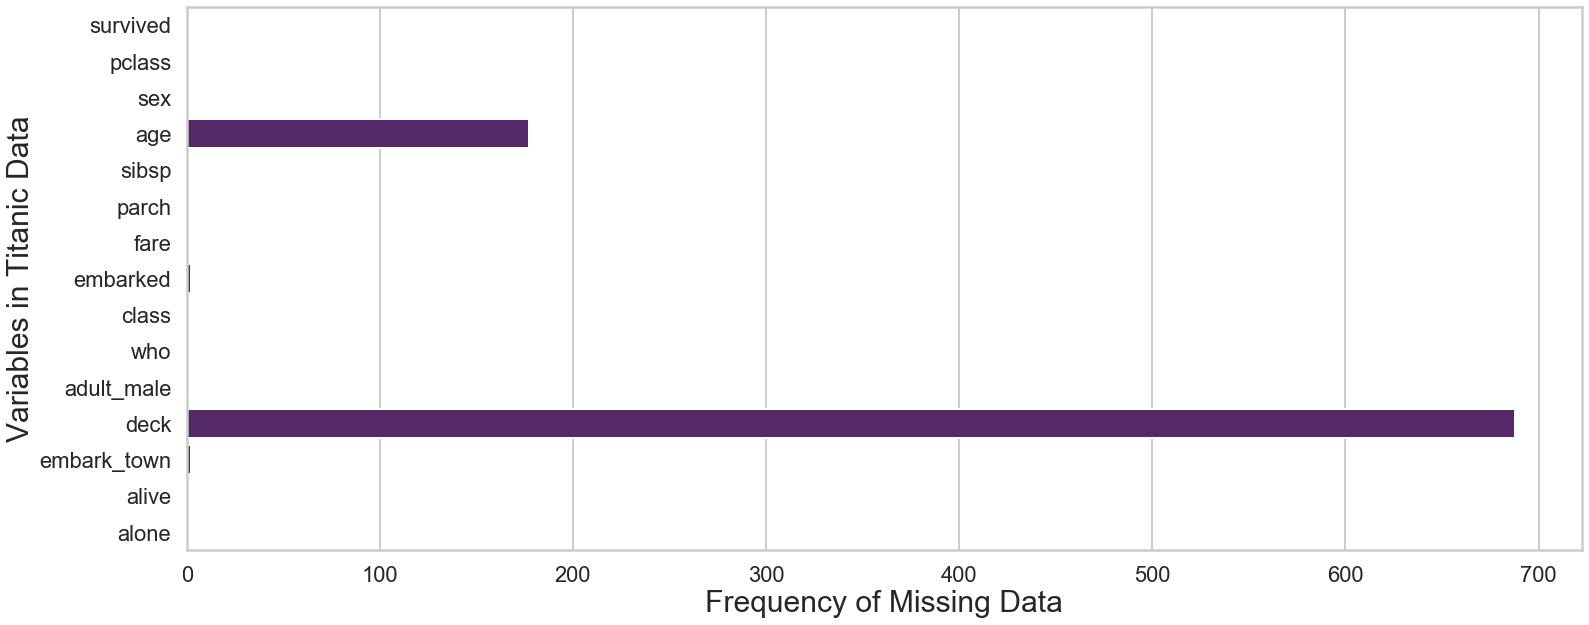

In [270]:
# Number 2a: Determine how much missing data there is for each variable, plotting it as a horizontal bar plot with seaborn

missingdata = df.isna().sum() # Calculating the number of NAs in the dataset by variable

print(missingdata) # Inspecting the table

plt.figure(figsize=(25,10)), # Setting the size of the figure

g =sns.barplot(x = missingdata.values, # Indicating the parameter for the x axis
                y=missingdata.index, # Indicating the parameter for the y axis
                color = "m") # Defining the color to use

g.set_ylabel('Variables in Titanic Data', fontsize = 30) # Setting a label and fontsize for the y axis

g.set_xlabel('Frequency of Missing Data', fontsize = 30) # Setting a label and fontsize for the x axis

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    2
889    0
890    1
Length: 891, dtype: int64


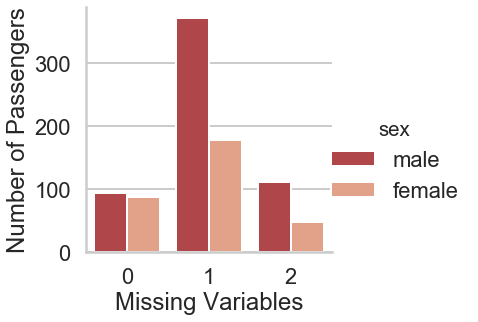

In [271]:
# Number 2b: Determine how much missing data there is for each passenger, 
# and make a vertical bar plot according to the amount of missing data, separated by gender 
# (there should be 3 bars, corresponding to “0”, “1”, and “2”

test = df.isna().sum(axis=1)
print(test)

missingdata_b = pd.DataFrame({"missing": test, "sex": df.sex})

sns.set_palette("RdBu")

g2 = sns.catplot("missing", 
                  hue="sex",
                  data=missingdata_b,
                  kind="count") 

g2.set_axis_labels(x_var="Missing Variables", y_var="Number of Passengers")

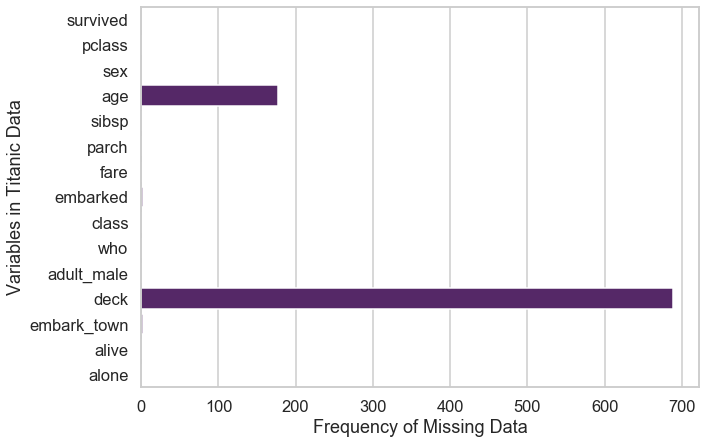

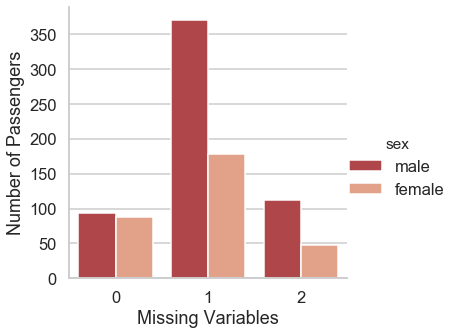

In [272]:
# Number 2c: Put both axes on the same figure

sns.set_context("talk")

#figure, (g,g2) =plt.subplots(ncols =2, nrows=1)
plt.figure(figsize=(10,7))
g =sns.barplot(x = missingdata.values, 
                y=missingdata.index, 
                color = "m") 
g.set_ylabel('Variables in Titanic Data') # Setting a label and fontsize for the y axis

g.set_xlabel('Frequency of Missing Data') # Setting a label and fontsize for the x axis

g2 = sns.catplot("missing", 
                  hue="sex",
                  data=missingdata_b,
                  kind="count")

g2.set_axis_labels(x_var="Missing Variables", y_var="Number of Passengers")

<Figure size 144x72 with 0 Axes>

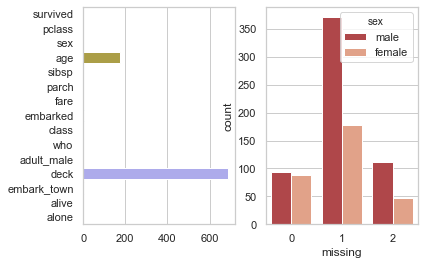

<Figure size 432.85x360 with 0 Axes>

In [273]:
# Number 2C: Put both axes on the same figure - Version 2 trying to get them side by side

sns.set_context("notebook")
plt.figure(figsize=(2,1))
figure, (g,g2) =plt.subplots(ncols =2)
sns.barplot(x=missingdata.values, y=missingdata.index, ax = g)
sns.catplot("missing", 
                  hue="sex",
                  data=missingdata_b,
                  kind="count", ax = g2)
plt.clf()

# Third graph shows up and I can't figure out what is going on.

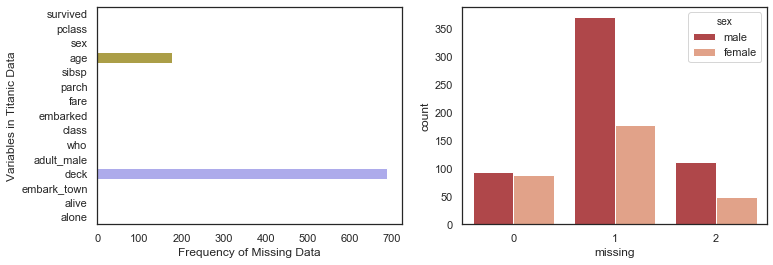

<Figure size 432.85x360 with 0 Axes>

In [274]:
# Number 2C: Put both axes on the same figure - Version 3 trying to get them side by side

with sns.axes_style('white'):
    sns.set_context("notebook")
    figs, (g, g2) = plt.subplots(ncols =2, nrows =1) #make a 2 column empty graph
    figs.set_size_inches(12, 4)

    figure1 = sns.barplot(x=missingdata.values, y=missingdata.index, ax = g)
    figure1.set_ylabel('Variables in Titanic Data') # Setting a label and fontsize for the y axis
    figure1.set_xlabel('Frequency of Missing Data') # Setting a label and fontsize for the x axis

    figure2 = sns.catplot("missing", hue="sex",
                  data=missingdata_b,
                  kind="count",ax = g2)
    figure2.set_axis_labels(x_var="Missing Variables", y_var="Number of Passengers")
# Third graph shows up and I can't figure out what is going on.
plt.clf()

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   

     who  adult_male deck  embark_town alive  alone Age_cats  
0    man        True  NaN  Southampton    no  False    Teens  
1  woman       False    C    Cherbourg   yes  False    Adult  
2  woman       False  NaN  Southampton   yes   True    Teens  
     survived  pclass   age  sibsp  parch     fare
0           0       3  22.0      1      0   7.2500
1           1       1  38.0      1      0  71.2833
2           1       3  26.0      0      0   7.9250
3           1       1  35.0      1      0  53.1000
4           0       3  35.0      0      0   8.0500
..        ...     ...   ...    ...    ...      ...
886         0       2  27.0      0      0  13.0000
887         1       1  19.0      0 

C:\Users\student2\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


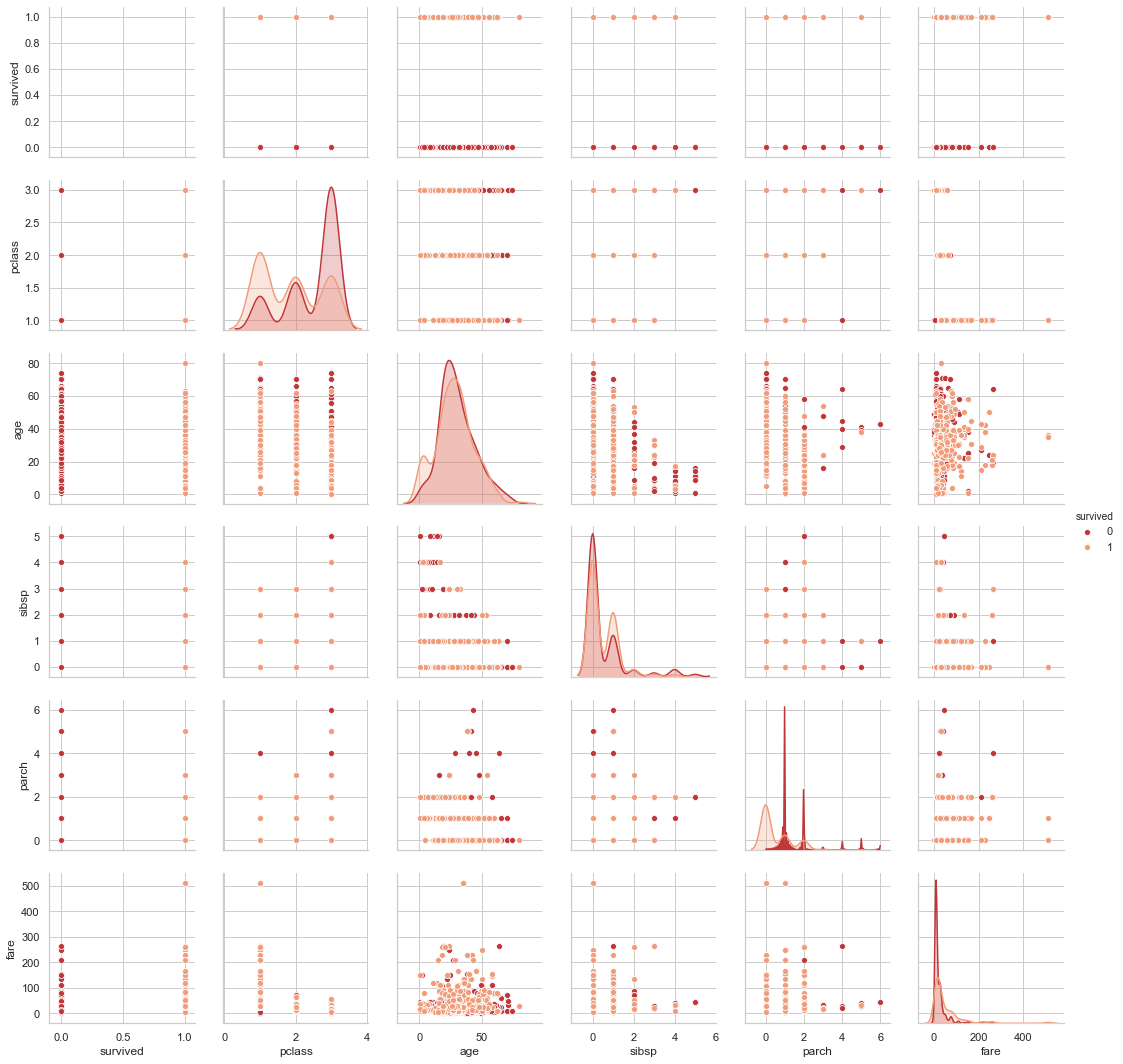

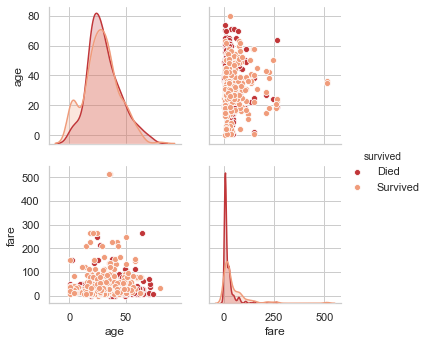

In [306]:
# Number 3A: Create a pairplot for all numerical variables in the dataset (dropna for age), colored by survival

print(df.iloc[:3]) # Looking at the first three lines of data

colnames_numerics_only = df.select_dtypes(include=np.number).columns.tolist() # Determining what columns contain numeric variables
colnames_numerics_only # Printing these column names

df_numerics_only = df.select_dtypes(include=np.number)
print(df_numerics_only)

df2 = df_numerics_only.dropna(subset=['age'])

# Based on the above there are six numeric variables
# Survived, pclass, age, sibsp, parch, and fare are all considered numeric variable

sns.pairplot(df2, hue = 'survived')

# Not all the variables above are actually numeric and some are more suited to be categorical

df3 = df2[['survived','age','fare']] # Subset data for actual numeric variables
print(df3)

sns.pairplot(df3, vars=["age", "fare"], hue = 'survived') # Redo the plot with these variables

80.0


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Age Group')]

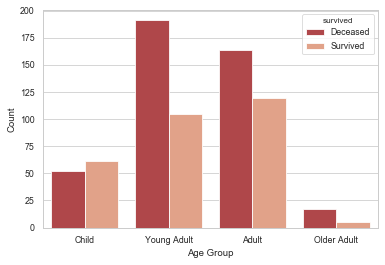

In [333]:
# 3B: Where age is not null, create a bar plot of survival and age grouping according to defined ranges of age for child, younger adult, adult, older adult 
# (you can pick the age ranges yourself, but they should be clear in the code)

# I used the df created in an above step, as this dataframe already has the NAs removed.

maxValue = df['age'].max() # Determining the maximum age in the data to determine age indexing
print(maxValue) # This indicates the max age in the dataset is 80

agegroups = (0,17,30,60,80) # Grouping the ages
cat = ['Child','Young Adult','Adult', 'Older Adult'] # Creating names for the groups above
df['Ages'] = pd.cut(df.age, agegroups, labels = cat)

sns.set_palette("RdBu")

ax = sns.countplot(x = 'Ages',  data = df, hue = 'survived')

ax.set(xlabel='Age Group', ylabel='Count')



Text(0.5, 0, 'Socio-economic Class')

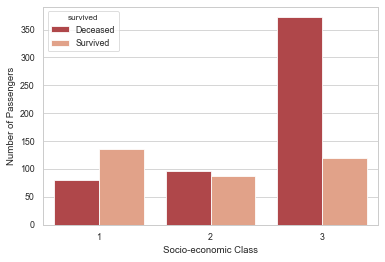

In [337]:
# 3C: Two additional plots: Survival based on economic status
# I reset the settings because I may have overwritten the prior dataframes

%reset -f


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style="whitegrid")
df = sns.load_dataset('titanic') 

sns.set_palette("RdBu") # Setting the color for graph
sns.set_context("paper")

df['survived'] = df['survived'].map({
    0: 'Deceased',
    1: 'Survived'
})



sns.countplot(x="pclass",hue="survived",data=df)
plt.ylabel("Number of Passengers")
plt.xlabel("Socio-economic Class")


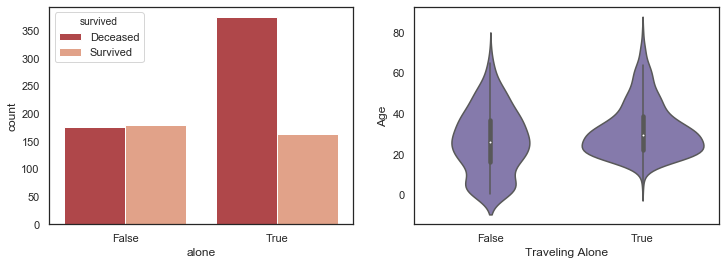

In [348]:
# 3C: Two additional plots: 
# Did individuals traveling alone have a greater chance of surviving? 
# What was the age distribution of individuals traveling alone?

with sns.axes_style('white'):
    sns.set_context("notebook")
    figs, (g, g2) = plt.subplots(ncols =2, nrows =1) #make a 2 column empty graph
    figs.set_size_inches(12, 4)

    figure1 = sns.countplot(x="alone",hue="survived",data=df, ax=g)

    figure2 = sns.violinplot(data = df, x = 'alone', y = 'age', color = "m",ax=g2)
    figure2.set(xlabel = 'Traveling Alone', 
        ylabel = 'Age', 
        xticklabels = ['False', 'True']);
